In [68]:
%pip install statsmodel
%pip install numpy
%pip install pandas
%pip install arch
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

# Early EDA

In [70]:
#read data
raw_csv_data = pd.read_csv("data/Index2018.csv")

In [71]:
#complete copy of dataframe
df_comp = raw_csv_data.copy()

In [72]:
#first 5 rows of dataset
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [73]:
#understand dataframe in more detail with describe()
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [74]:
# check if missing values
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting Data

In [75]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'S&P500 Prices'}>

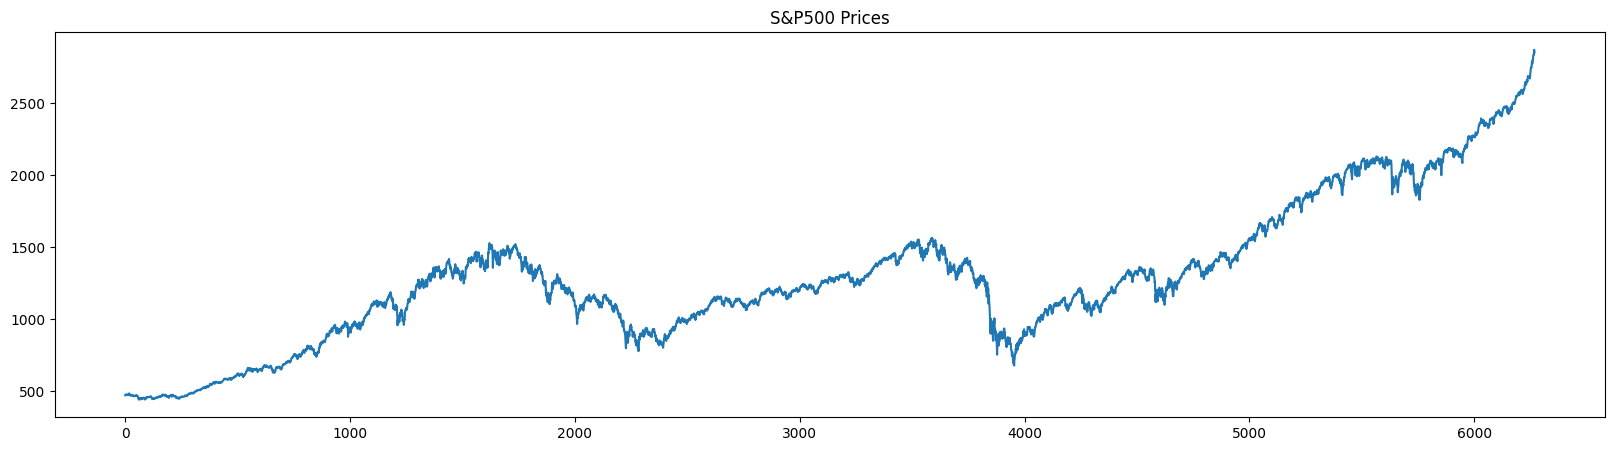

In [76]:
# plot of spx
df_comp.spx.plot(title="S&P500 Prices", figsize=(20,5))

<Axes: title={'center': 'FTSE100 Prices'}>

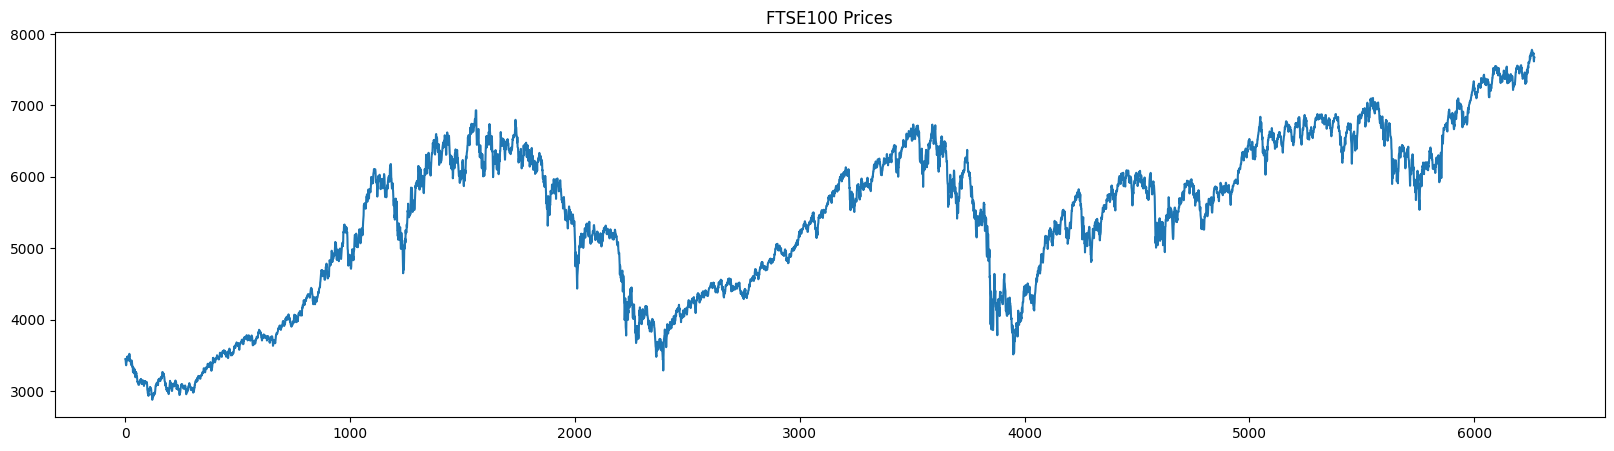

In [77]:
# plot of ftse
df_comp.ftse.plot(title="FTSE100 Prices", figsize=(20,5))

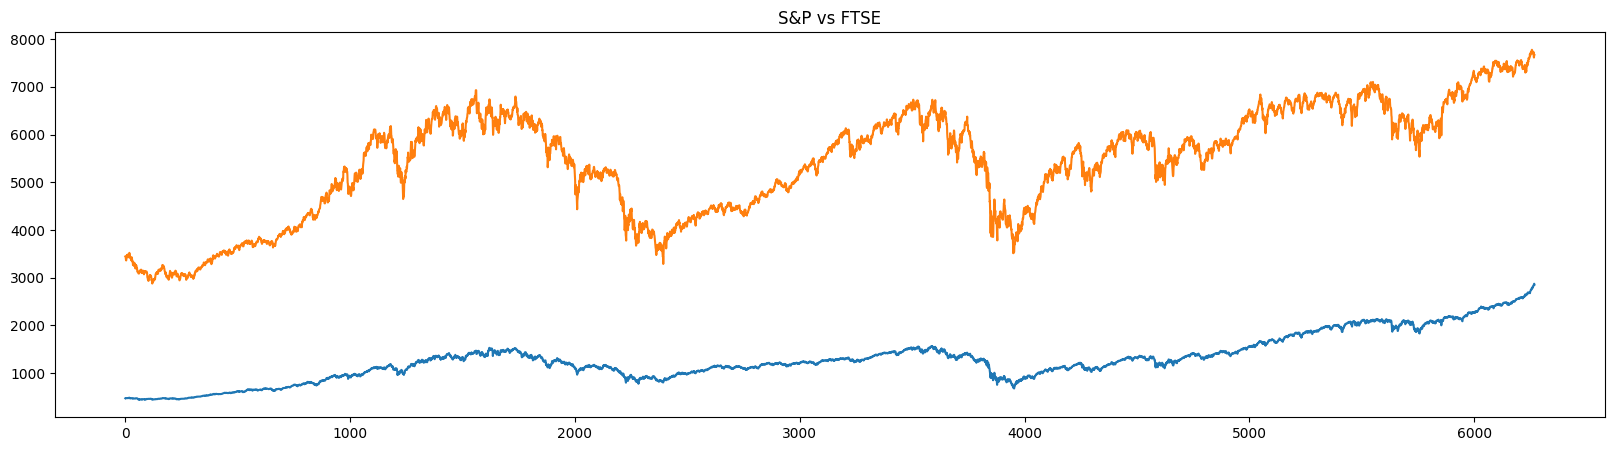

In [78]:
# combined plot
df_comp.spx.plot(title="S&P500 Prices", figsize=(20,5))
df_comp.ftse.plot(title="FTSE100 Prices", figsize=(20,5))
plt.title('S&P vs FTSE')
plt.show()

## QQ Plot Quantile-Quantile Plot

In [79]:
import scipy.stats
import pylab

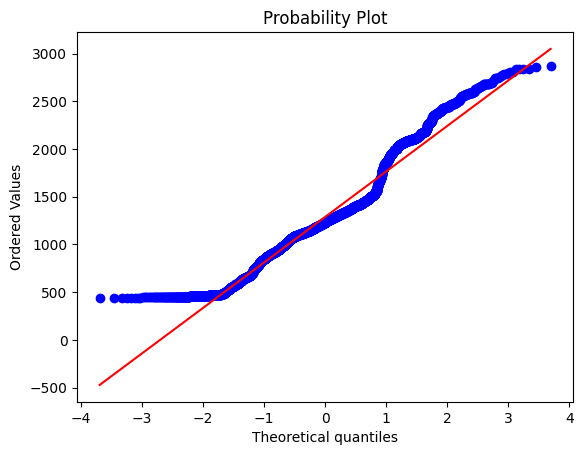

In [80]:
#check if dataset is distributed a certain way
scipy.stats.probplot(x=df_comp.spx, plot=pylab)
pylab.show()

# QQ Plot takes all the values a variable can take, and arranges them in accending order
# y-axis represents the prices
# x-axis represents the theoretical quantiles/how many standard deviations from the mean these values are
# red diagonal represents what the data points should follow if they are normally distributed

## Manipulate Timeseries

### Transform Date from text to date_time

In [81]:
df_comp.date.describe()
# python doesnt recognize date as a numeric value and therefore picks things like the top value arbitrary
# date must be converted to date_time

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [82]:
# converting from text to date with dayfirst, because it doesnt match the pattern
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True)

In [83]:
# checks
print(df_comp.head())
print("\n")
print(df_comp.date.describe())



        date     spx      dax     ftse    nikkei
0 1994-01-07  469.90  2224.95  3445.98  18124.01
1 1994-01-10  475.27  2225.00  3440.58  18443.44
2 1994-01-11  474.13  2228.10  3413.77  18485.25
3 1994-01-12  474.17  2182.06  3372.02  18793.88
4 1994-01-13  472.47  2142.37  3360.01  18577.26


count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object


### Setting the Index

In [84]:
df_comp.set_index("date", inplace=True)

In [85]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the desired Frequency

In [86]:
# setting the frequency on daily because in the original dataset we the day as a timestamp
df_comp = df_comp.asfreq('b')

In [87]:
# getting NaN values as for example those two days are not included in the original dataset 
# --> we generated new periods without values
# those 2 values are the weekends where no stockprices can be closed, as for that we need to change the freq to 'b' for businessdays
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Handling missing values

In [88]:
# setting freq to business days must've generated 8 dates without any values
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [89]:
# fillna() method fills out missing values in different values
# front filling --> assigns the value of the previous period
# back filling --> vice versa to fron filling
# assign the average, but is a bad approach for timeseries

# front filling
df_comp.spx = df_comp.spx.fillna(method= 'ffill')

# back filling
df_comp.ftse = df_comp.ftse.fillna(method= 'bfill')

#average
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean())

In [90]:
# check
df_comp.isna().sum()

#spx has no missing values anymore --> code works

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

### simplifying the dataset

In [91]:
# assuming you only want to analyze S&P500
# you can create a new colum called market_value like this
# df_comp['market_value'] = df_comp.spx
# then del the none necessary columns like this
# del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

C:\Users\lhauser\AppData\Local\Temp\ipykernel_31008\85709555.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_comp.market_value = df_comp.spx


In [113]:
#or you can just copy the value into a new df
spx_comp = df_comp.copy()
spx_comp = spx_comp.rename(columns = {'spx': 'market_value'})
del spx_comp['dax'], spx_comp['ftse'], spx_comp['nikkei']

In [114]:
spx_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Splitting Data
- we usually shuffle the data, but timeseries requires the chronological order --> no shuffeling
- size of test size is debatable, normally 80/20

In [115]:
# declaring size should be 80% of original dataset
size = int(len(spx_comp)*0.8)


In [116]:
# splitting with iloc[]
df = spx_comp.iloc[:size]
df_test = spx_comp.iloc[size:]

In [117]:
# make sure there are no overlapping values
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [118]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# Types of Timeseries

## White Noise
- special type of timeseries, where the data doesn't follow a pattern
- white noise is pretty unpredictable

**Condition for being White Noise**:
- constant mean
- constant variance
- no autocorrelation in any period, means no clear relationship between past and future
- a sequence of random data, where every value has a time-period assoicated with it

In [119]:
# generating white noise data
# mean and standard deviation should be set to that of the actual set loc & scale

wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [120]:
# adding it to the original df
df['wn'] = wn

C:\Users\lhauser\AppData\Local\Temp\ipykernel_31008\3970156815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [121]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.287446
std,292.559287,295.052466
min,438.920000,62.491893
25%,914.620000,888.748237
50%,1144.650000,1089.514994
75%,1316.280729,1294.425994
max,1570.252238,2100.499654


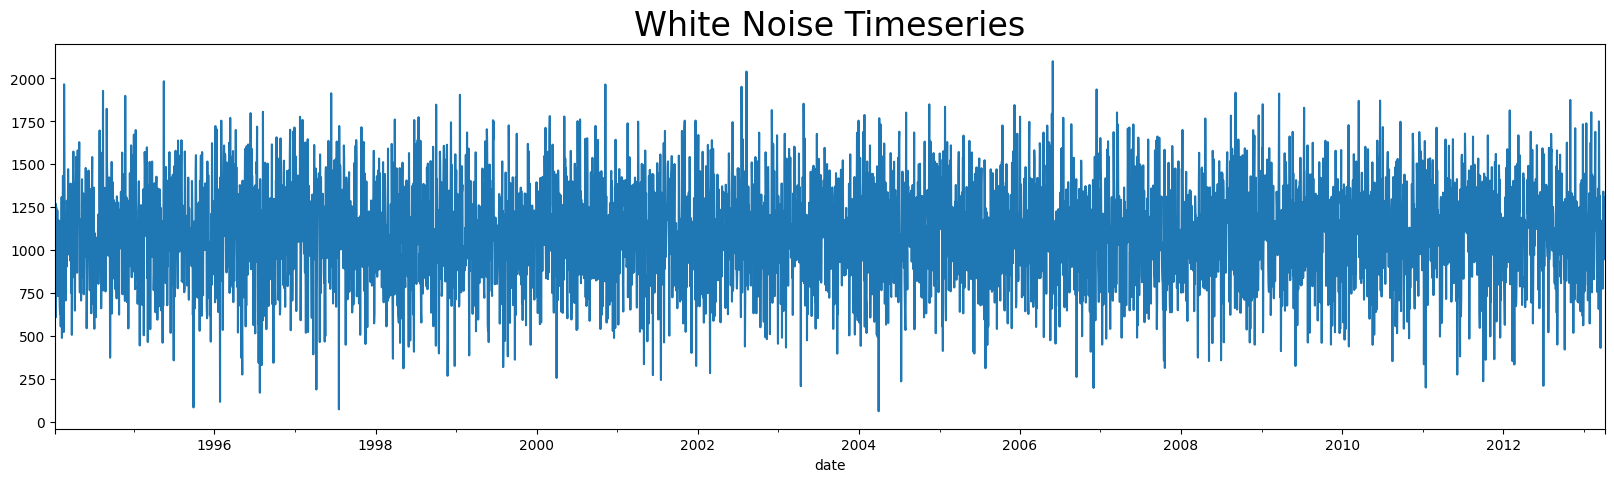

In [126]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Timeseries", size=24)
plt.show()

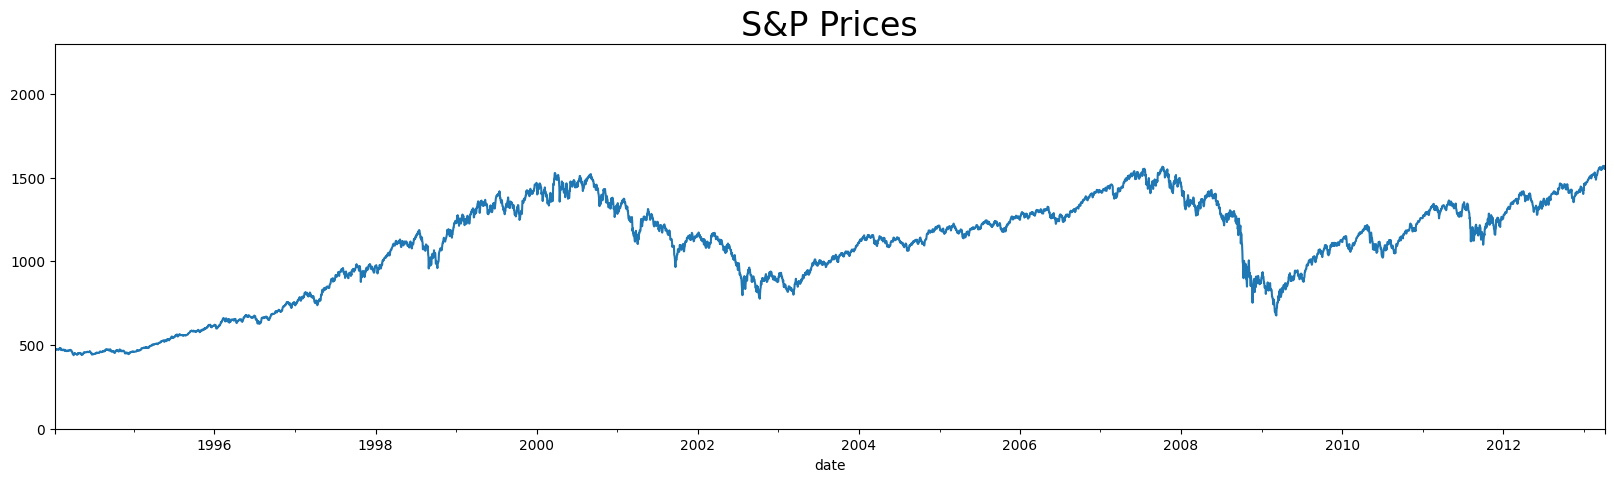

In [128]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size= 24)
plt.ylim(0,2300)
plt.show()

## Random Walk
- special type of timeseries, where values tend to persist over time and the differences between periods are simply white noise
- This means that Pt = Pt-1 + Residuals, where Residuals mean white noise
- therefore the best way to predict Pt+1 is Pt, and for Pt+2 is Pt+1
- no great accuracy for future predicitions

In [133]:
rw = pd.read_csv("data/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [138]:
df.describe()

,market_value,wn,rw
count,5021.000000,5021.000000,5021.000000
mean,1091.651926,1092.287446,1269.944293
std,292.559287,295.052466,444.216793
min,438.920000,62.491893,585.483034
25%,914.620000,888.748237,931.550429
50%,1144.650000,1089.514994,1156.363045
75%,1316.280729,1294.425994,1488.362029
max,1570.252238,2100.499654,2715.508720


In [136]:
df['rw'] = rw.price

C:\Users\lhauser\AppData\Local\Temp\ipykernel_31008\818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [137]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,889.048970,1122.139662
1994-01-10,475.27,1134.373099,1080.347860
1994-01-11,474.13,1272.581684,1082.095245
1994-01-12,474.17,609.802205,1083.639265
1994-01-13,472.47,1253.777656,1067.146255


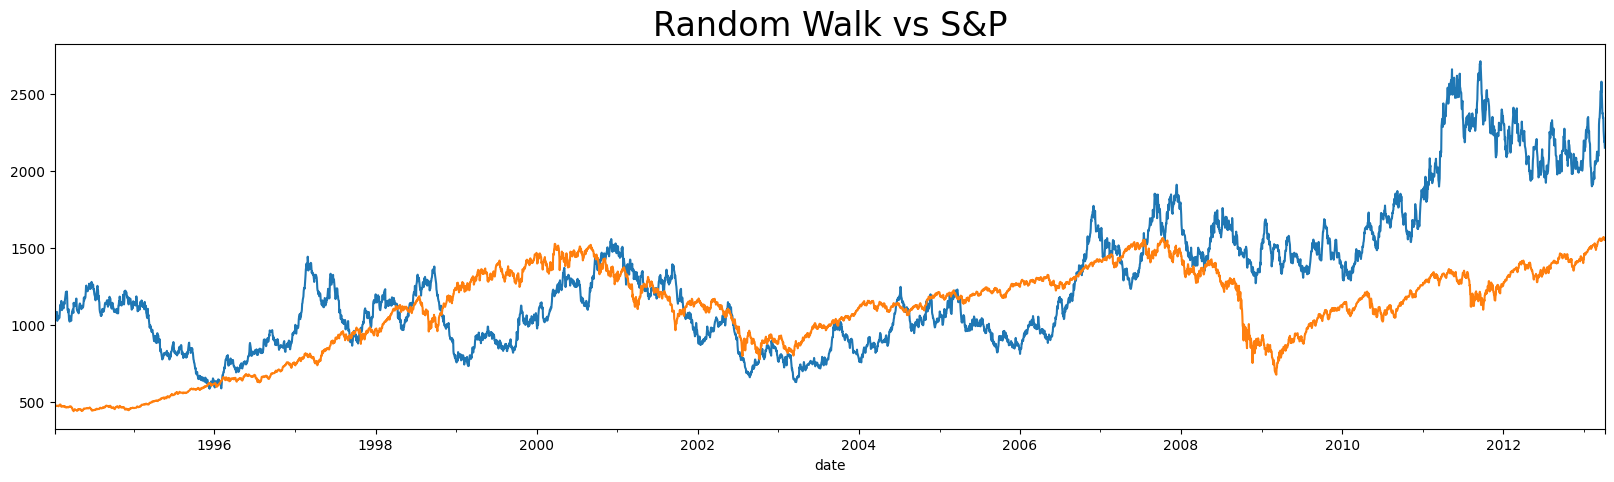

In [141]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size= 24)
plt.show()

## Stationarity

- correlation measures the similarity in the change of values of two series

- Stationarity refers to a property of the time series where its statistical properties remain constant over time.
- considering 3 key aspects:
    - constant mean
    - constant variance
    - constant autovariance

### weak stationarity
- 2 Sequence with the same covariance Cov(S1) = Cov(S2) which is also referred as *weak-form stationarity* or *covariance stationarity*
- e.g. Cov(x1,x4) = Cov(x3,x6)

### strict stationarity
- ideal form of stationarity, but extremly rarely observed in nature
- identical distributions

- Therefore Stationarity = covariance stationarity

- Dickey-Fuller Test to detect if a timeseries follows a stationary or non-stationary process
    - if test statistic < critical value => stationarity


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [153]:
# dickyfuller test using statsmodels
sts.adfuller(df.market_value)

(-1.7369847452352436,
 0.4121645696770623,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [155]:
sts.adfuller(df.rw)

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

- Trends will appear in cyclical bases
- decomppsition of timeseries into 3 effects
    - Trend --> Pattern
    - Seasonal --> Cyclical effects
    - Residual --> Error of prediction

### Naive Decomposition
*Additive*
- observed = trend + seasonal + residual

*multiplicative*
- observed = trend * seasonal * residual

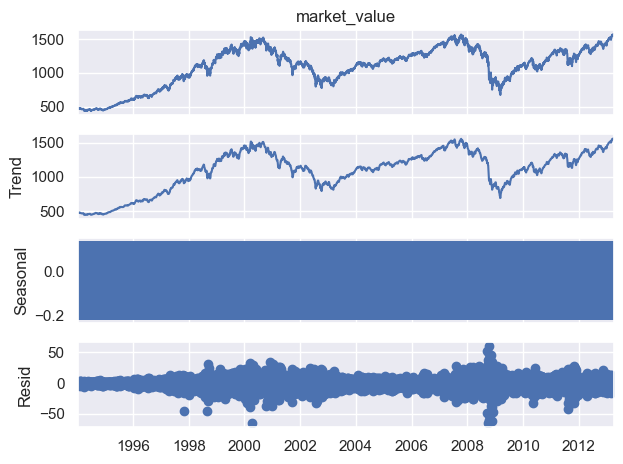

In [158]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

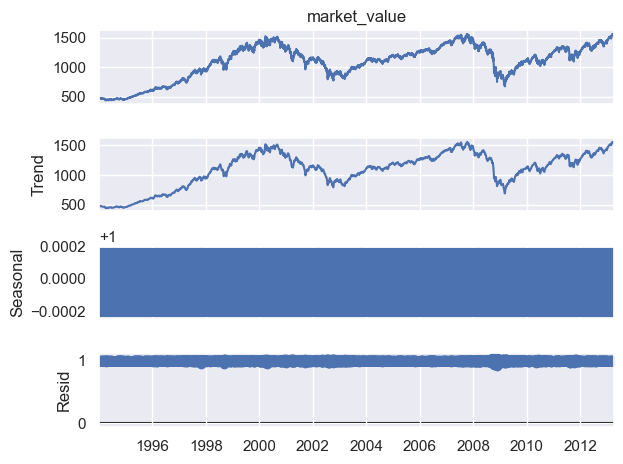

In [159]:
s_dec_multi  = seasonal_decompose(df.market_value, model="multiplicative")
s_dec_multi.plot()
plt.show()

# Autocorrelation Function (ACF)

- computes the autocorrelation function for a variety of different lags

Text(0.5, 1.0, 'ACF S&P500')

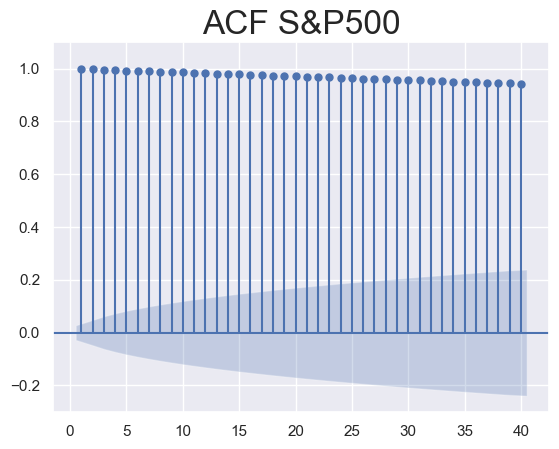

In [168]:
sgt.plot_acf(df.market_value, lags= 40, zero=False)
plt.ylim(-0.3,1.1)
plt.title('ACF S&P500', size=24)

Text(0.5, 1.0, 'ACF WN')

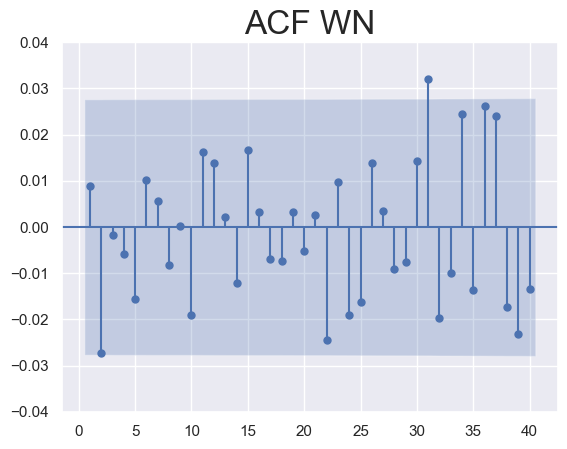

In [171]:
sgt.plot_acf(df.wn, lags= 40, zero=False)
plt.ylim(-0.04,0.04)
plt.title('ACF WN', size=24)

# Partial Autocorrelation Function (PACF)

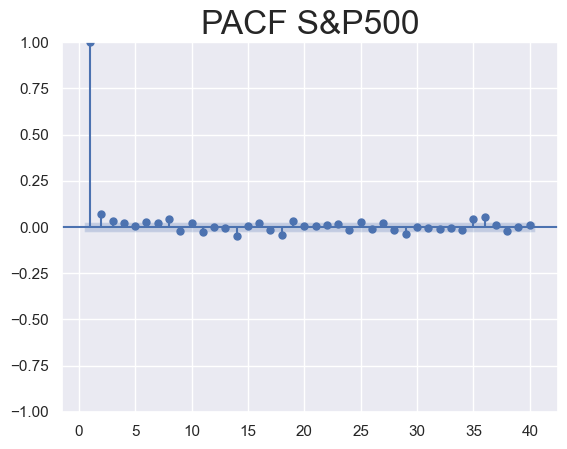

In [174]:
sgt.plot_pacf(df.market_value, lags= 40, zero=False, method= ('ols'))
plt.title("PACF S&P500", size =24)
plt.show()